In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_lables), (test_images, test_lables) = fashion_mnist.load_data()
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [3]:
print(len(test_lables))
len(train_lables)

10000


60000

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

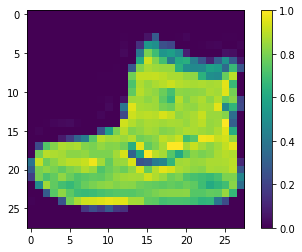

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

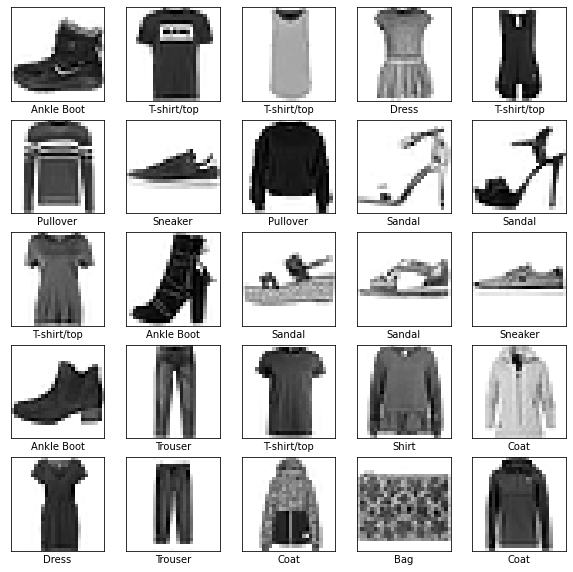

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_lables[i]])
plt.show()

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_lables,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4965 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3786 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3385 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3150 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2946 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2804 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2709 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2555 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2498 - accuracy: 0.9061
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.238

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_lables, verbose=2)
print('\nTest acc :', test_acc)

313/313 - 1s - loss: 0.3355 - accuracy: 0.8824 - 659ms/epoch - 2ms/step

Test acc : 0.8823999762535095


In [15]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [16]:
predictions = probability_model.predict(test_images)

In [17]:
predictions[0]

array([3.8868129e-05, 1.6788650e-08, 2.3764649e-08, 8.2351995e-08,
       3.1644737e-07, 2.5855299e-04, 4.0723853e-07, 4.3223053e-02,
       3.0595861e-06, 9.5647562e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_lables[0]

9

In [36]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else :
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                100*np.max(predictions_array),
                                class_name[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

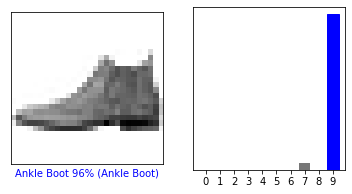

In [37]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_lables, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i], test_lables)
plt.show()

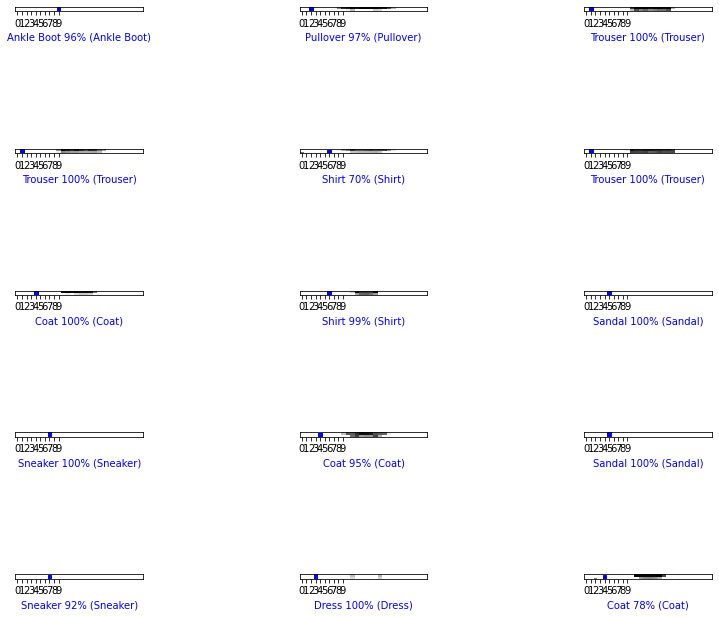

In [42]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols 
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_lables, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_value_array(i,predictions[i],test_lables)
plt.tight_layout()
plt.show()

In [62]:
img = test_images[1]

print(img.shape)

(28, 28)


In [63]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [64]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.2188560e-04 1.1418236e-14 9.7072124e-01 6.6690657e-09 2.8767569e-02
  5.6598034e-12 2.8932357e-04 6.7694921e-16 4.3031728e-12 9.1877428e-13]]


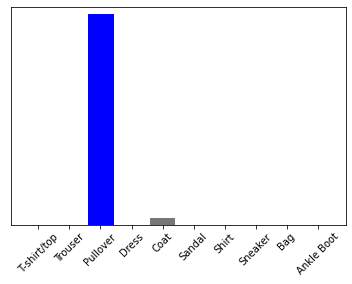

In [74]:
plot_value_array(1, predictions_single[0], test_lables)
_ = plt.xticks(range(10), class_name, rotation=45)
plt.show()

In [69]:
np.argmax(predictions_single[0])

2